# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Aplicación de Modelos de Machine Learning y Acoplamiento Molecular en el Diseño Acelerado de Fármacos, propuesta contra la Viruela del Simio (MPOX). Enfoque en la Proteína F13; con Datos Experimentales Limitados.**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Carlos Alberto Brizuela Rodríguez  – Profesor Tutor

#### **Miembro del equipo:**
- Carlos Mario Larrahondo Valencia - A01794031




---


### Análisis exploratorio de datos
#### Background:

El fin específico del diseño de fármacos es que; una vez analizada una enfermedad o patología se determina la molécula clave, con la cual se define un actuar o necesidad específica, como es la inhibición de enzimas o el tratamiento de otros elementos, por la cual se ha diseñado el fármaco. Esta molécula clave, es el resultado de análisis realizados  o estudios referente a las propiedades moleculares, grupos funcionales, geometría molecular y la estructura electrónica, también se determinan de estudios realizados a moléculas análogas que ya se encuentran catalogadas. (Desc/MeSH, 2019).

El desarrollo en la industria de un nuevo fármaco requiere de un alto costo debido a la inversión en profesionales y en la realización de muestras y pruebas de laboratorio; adicionalmente se debe tener en cuenta que el tiempo promedio de llevar un nuevo fármaco al mercado es de 10 a 13 años en promedio y lograr que el compuesto objetivo sea finalmente convertido en fármaco (Farmaindustria, 2023). Un estudio del MIT afirma que solo el 13.8% de los medicamentos pasan de forma exitosa los ensayos clínicos (Ester pallarés, 2020).  

Hoy en día se desea cubrir la necesidad de una manera más eficaz y que permita ser una ayuda al desarrollo de los compuestos que permitan generar respuestas acertadas, ante la aparición de nuevas enfermedades o brotes que causan rápidamente altos contagios y muertes en el mundo. Esto ha impulsado en la industria farmacológica la competencia en el desarrollo de patentes y el diseño ágil de medicamentos para atacar de manera efectiva las diferentes enfermedades y que los inversionistas puedan contar con un retorno de la inversión más rápido. Modelos generados con las técnicas de machine learning y combinados con el uso de acoplamiento molecular, están impulsando el desarrollo acelerado de fármacos (DAF), usados en entornos académicos e industriales.

El poder desarrollar farmacos que permitan atender  La viruela del simio (MPOX) es una enfermedad zoonótica, que se ha identificado  emergente causada por el virus de la viruela del simio (MPXV), un miembro del género Orthopoxvirus en la familia Poxviridae (Sklenovská, Ranst. 2018).





---



### EDA - Exploratory Data Analysis by code in Python

Comenzaremos con este Análisis a través de código python.

#### Instalar librerias faltantes

*Nota de ejecución:* **Ejecutable en Google Colab.**

In [1]:
# Instalación de rdkit
# Sin Output en consola
%%capture
! pip install chembl_webresource_client
! pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
! pip install rdkit

#### Importar librerias

In [2]:
# Importamos todas las librerías necesarias
import pandas as pd
from chembl_webresource_client.new_client import new_client
from google.colab import drive
import locale
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

Proteínas en la Farmacia: El caso de F13



*Algunos de los compuestos inhibidores de la proteina F13 se listan a continuación:*




#### Dataset

ChEMBL es una base de datos de acceso abierto que alberga una vasta colección de información sobre moléculas bioactivas y sus actividades farmacológicas. Mantenida por el Instituto Europeo de Bioinformática (EMBL-EBI), ChEMBL ofrece datos curados sobre millones de compuestos, incluyendo sus estructuras químicas, propiedades, mecanismos de acción y resultados de ensayos biológicos.

En este proyecto, utilizaremos ChEMBL como fuente principal de datos para la construcción de un modelo de IA capaz de predecir la eficiencia de inhibición de F13 por parte de diferentes compuestos. La riqueza de información de ChEMBL nos permitirá explorar las relaciones entre la estructura química de las moléculas y su actividad biológica, guiándonos en la búsqueda de nuevos candidatos a fármacos para el tratamiento del cáncer.

#### Definir medicamentos inhibidores de acuerdo a su ChEMBL ID



#### Inhibidores de la Proteina F13 (Proteína de envoltura):

Función: Importante para el ensamblaje y la liberación de viriones.
Relevancia para el ciclo viral: Objetivo potencial para interrumpir la propagación del virus.

In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Display all columns
pd.set_option('display.max_columns', None)

# Crear cliente para targets
target_client = new_client.target

# Buscar objetivos que contengan "F13" en su nombre o descripción
targets = target_client.filter(target_synonym__icontains='F13')

# Obtener los IDs de los objetivos
target_ids = [target['target_chembl_id'] for target in targets]

# Crear cliente para bioactividad
activity_client = new_client.activity

# Lista para almacenar los DataFrames individuales
dataframes = []

for target_id in target_ids:
    try:
        # Obtener actividades (incluyendo IC50) para cada objetivo relacionado con "F13"
        activities = activity_client.filter(target_chembl_id=target_id, standard_type="IC50")

        if activities:
            # Convertir la respuesta en un DataFrame y agregar el ID del objetivo
            df_temp = pd.DataFrame.from_dict(activities)
            df_temp['target_chembl_id'] = target_id

            # Añadir el DataFrame a la lista
            dataframes.append(df_temp)

    except Exception as e:
        print(f'Error al procesar el objetivo {target_id}: {str(e)}')

In [4]:
# Concatenar todos los DataFrames en uno solo
if dataframes:
    df_search = pd.concat(dataframes, ignore_index=True)
    print(df_search)
else:
    print("No se encontraron resultados.")

                                           action_type activity_comment  \
0                                                 None             None   
1                                                 None             None   
2                                                 None             None   
3                                                 None             None   
4                                                 None             None   
..                                                 ...              ...   
330  {'action_type': 'INHIBITOR', 'description': 'N...             None   
331  {'action_type': 'INHIBITOR', 'description': 'N...             None   
332  {'action_type': 'INHIBITOR', 'description': 'N...             None   
333  {'action_type': 'INHIBITOR', 'description': 'N...             None   
334                                               None             None   

     activity_id                                activity_properties  \
0        1499556            

In [5]:
df_search

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1499556,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '20.72', 'le': '0.42', 'lle': '3.24', ...",CHEMBL192660,None,CHEMBL192660,4.96,0,http://www.openphacts.org/units/Nanomolar,387717,=,1,1,=,None,IC50,nM,None,11000.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,11.0
1,None,None,1499557,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.86', 'le': '0.31', 'lle': '2.90', ...",CHEMBL190568,None,CHEMBL190568,5.64,0,http://www.openphacts.org/units/Nanomolar,387718,=,1,1,=,None,IC50,nM,None,2300.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.3
2,None,None,1499662,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '15.64', 'le': '0.32', 'lle': '3.10', ...",CHEMBL365470,None,CHEMBL365470,6.16,0,http://www.openphacts.org/units/Nanomolar,387738,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.7
3,None,None,1499663,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.38', 'le': '0.30', 'lle': '2.61', ...",CHEMBL189379,None,CHEMBL189379,5.66,0,http://www.openphacts.org/units/Nanomolar,387739,=,1,1,=,None,IC50,nM,None,2200.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.2
4,None,None,1499664,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '16.22', 'le': '0.34', 'lle': '4.24', ...",CHEMBL193212,None,CHEMBL193212,6.89,0,http://www.openphacts.org/units/Nanomolar,387760,=,1,1,=,None,IC50,nM,None,130.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23286375,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838274,Inhibition of p37 in Vaccinia virus Copenhagen...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,None,None,CHEMBL4837211,Eur J Med Chem,2021,"{'bei': '17.16', 'le': '0.33', 'lle': '1.75', ...",CHEMBL4878636,None,CHEMBL4878636,6.29,0,http://www.openphacts.org/units/Nanomolar,3623297,=,1,1,=,None,IC50,nM,None,515.0,CHEMBL4296170,Vaccinia virus (strain Western Reserve) (VACV)...,Envelope phospholipase F13 (p37),10254,None,None,IC50,uM,UO_0000065,None,0.515
331,"{'action_type': 'INHIBITOR', 'descriptio

In [6]:
len(df_search)

335

#### Búsqueda proteina target: F13

**Nota de ejecución: Ejecutable en Google Colab**

#### Seleción y filtrado de datos de bioactividad para la proteina F13

In [7]:
records_df = len(df_search)
print(f'Number of records in the dataset: {records_df}')

Number of records in the dataset: 335


### Descripción de columnas relevantes dentro del dataframe:

A continuación, se describe brevemente el contenido de cada columna del DataFrame, proveniente de la base de datos ChEMBL:

*Información de la Actividad Biológica:*

* **action_type**: Describe el tipo de acción del compuesto sobre la diana (ej: inhibidor, agonista).

* **activity_comment**: Comentarios adicionales sobre la actividad del compuesto.

* **activity_id**: Identificador único para cada registro de actividad.

* **activity_properties**: Información adicional sobre la actividad en formato JSON.

* **assay_chembl_id**: Identificador único del ensayo en el que se midió la actividad.

* **assay_description**: Descripción del ensayo biológico.

* **assay_type**: Tipo de ensayo (ej: binding, funcional).

* **assay_variant_accession**: Número de acceso a la variante de la proteína diana utilizada en el ensayo.

* **assay_variant_mutation**: Descripción de la mutación en la variante de la proteína diana.

* **bao_endpoint**: Punto final biológico medido en el ensayo.

* **bao_format**: Formato del valor de actividad medido.

* **bao_label**: Etiqueta del valor de actividad medido.

* **relation**: Relación entre el valor de actividad y el punto final biológico.

* **standard_flag**: Indica si el valor de actividad está estandarizado.

* **standard_relation**: Relación entre el valor de actividad estandarizado y el punto final biológico.

* **standard_text_value**: Valor de actividad estandarizado en formato texto.

* **standard_type**: Tipo de valor de actividad estandarizado.

* **standard_units**: Unidades del valor de actividad estandarizado.

* **standard_upper_value**: Límite superior del valor de actividad estandarizado.

* **standard_value**: Valor de actividad estandarizado. Es la potencia de la droga, mientras menor sea el valor más eficaz es, debido a que un mayor significa que se requiere de una mayor cantidad de droga para tener el mismo efecto.

* **text_value**: Valor de actividad en formato texto.

* **type**: Tipo de valor de actividad.

* **units**: Unidades del valor de actividad.

* **upper_value**: Límite superior del valor de actividad.

* **value**: Valor de actividad numérico.

*Información del Compuesto:*

* **canonical_smiles**: Representación SMILES canónica de la estructura del compuesto.

* **ligand_efficiency**: Eficiencia del ligando (compuesto) en su interacción con la diana.

* **molecule_chembl_id**: Identificador único del compuesto en ChEMBL.

* **molecule_pref_name**: Nombre preferido del compuesto en ChEMBL.
parent_molecule_chembl_id: Identificador único de la molécula parental del compuesto en ChEMBL.

*Información de la Diana:*

* **target_chembl_id**: Identificador único de la diana (proteína) en ChEMBL.

* **target_organism**: Organismo de origen de la diana.

* **target_pref_name**: Nombre preferido de la diana en ChEMBL.

* **target_tax_id**: Identificador taxonómico de la diana.

*Información Adicional:*

* **data_validity_comment**: Comentarios sobre la validez de los datos.

* **data_validity_description**: Descripción de la validez de los datos.

* **document_chembl_id**: Identificador único del documento (publicación) asociado a la actividad.

* **document_journal**: Nombre de la revista científica donde se publicó el documento.

* **document_year**: Año de publicación del documento.

* **pchembl_value**: Valor de -log10(IC50, EC50, Ki, Kd, o Potency), utilizado para comparar actividades.

* **potential_duplicate**: Indica si el registro es un posible duplicado.

* **qudt_units**: Unidades del valor de actividad según el sistema QUDT.

* **record_id**: Identificador único del registro en ChEMBL.

* **src_id**: Identificador de la fuente de datos original.

* **toid**: Identificador del objetivo (target) en otra base de datos.

* **uo_units**: Unidades del valor de actividad según el sistema UO.

In [8]:
# Verificar que solo se cuente con registros de IC50
df_search.standard_type.unique()

array(['IC50'], dtype=object)

In [9]:
# Visualizar rango de valores de standard value
df_search.standard_value.unique()

array(['11000.0', '2300.0', '700.0', '2200.0', '130.0', '1900.0', '910.0',
       '100000.0', '170000.0', '100.0', '110.0', '420.0', '620.0', None,
       '770.0', '80000.0', '430.0', '1100.0', '410.0', '720.0', '500.0',
       '960.0', '600.0', '850.0', '2100.0', '440.0', '520.0', '310.0',
       '480.0', '670.0', '350.0', '280.0', '8900.0', '27000.0', '870.0',
       '6800.0', '46000.0', '16000.0', '740.0', '210.0', '39.0', '320.0',
       '330.0', '250.0', '340.0', '630.0', '230.0', '380.0', '470.0',
       '180.0', '240.0', '760.0', '200.0', '300.0', '570.0', '220.0',
       '370.0', '1400.0', '1200.0', '980.0', '1600.0', '1300.0', '1500.0',
       '3300.0', '2500.0', '26000.0', '2400.0', '51.0', '66.0', '6700.0',
       '3600.0', '6400.0', '35000.0', '67000.0', '21000.0', '200000.0',
       '20000.0', '30000.0', '2000.0', '105000.0', '10000.0', '50000.0',
       '5000.0', '1700.0', '86.0', '90.0', '4.0', '48.0', '55.0',
       '4000.0', '18000.0', '610.0', '26.0', '5700.0', '36200

#### Salvar dataset original en Google Drive

In [10]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
locale.getpreferredencoding = lambda: "UTF-8"
# Crear carpeta dentro de google drive llamada data
! mkdir '/content/drive/My Drive/Colab Notebooks/data'

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/data’: File exists


In [12]:
# Subir el csv a la carpeta destino
df_search.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv', index=False)

In [13]:
# Verificar que el archivo se encuentra en la carpeta destino
! ls -l '/content/drive/My Drive/Colab Notebooks/data'

total 642
-rw------- 1 root root  50900 Oct  6 23:22 bioactivity_data_2class_pIC50.csv
-rw------- 1 root root 249499 Oct 13 16:32 bioactivity_data.csv
-rw------- 1 root root  36412 Oct  6 23:21 bioactivity_data_curated.csv
-rw------- 1 root root  33967 Oct  6 23:20 bioactivity_data_preprocessed.csv
-rw------- 1 root root    122 Oct  6 23:22 mannwhitneyu_LogP.csv
-rw------- 1 root root    119 Oct  6 23:22 mannwhitneyu_MW.csv
-rw------- 1 root root    132 Oct  6 23:23 mannwhitneyu_NumHAcceptors.csv
-rw------- 1 root root    128 Oct  6 23:23 mannwhitneyu_NumHDonors.csv
-rw------- 1 root root    125 Oct  6 23:22 mannwhitneyu_pIC50.csv
-rw------- 1 root root  14091 Oct  6 23:22 plot_bioactivity_class.pdf
-rw------- 1 root root  15356 Oct  6 23:22 plot_ic50.pdf
-rw------- 1 root root  13732 Oct  6 23:22 plot_LogP.pdf
-rw------- 1 root root  13348 Oct  6 23:22 plot_MW.pdf
-rw------- 1 root root  50625 Oct  6 23:22 plot_MW_vs_LogP.pdf
-rw------- 1 root root  15782 Oct  6 23:23 plot_NumHAccepto

Ver contenido de **bioactivity_data.csv**

In [14]:
! head '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv'

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1499556,[],CHEMBL877318,In vitro inhibitory concentration of compound against factor XIIIa,B,,,BAO_0000190,BAO_0000357,single protein format,NCCCCCCNc1nsc2nccn12,,,CHEMBL1145208,J Med Chem,2005,"{'bei': '20.72', 'le': '0.42', 'lle': '3.24', 'sei': '7.27'}",CHEMBL192660,,CHEMBL192660,4.96,0,http://www.openph

#### Manejo de valores faltantes
Dado que nos interesa conocer el standard value, los registros que no cuenten con esta información serán eliminados

In [15]:
df2 = df_search[df_search.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1499556,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '20.72', 'le': '0.42', 'lle': '3.24', ...",CHEMBL192660,None,CHEMBL192660,4.96,0,http://www.openphacts.org/units/Nanomolar,387717,=,1,1,=,None,IC50,nM,None,11000.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,11.0
1,None,None,1499557,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.86', 'le': '0.31', 'lle': '2.90', ...",CHEMBL190568,None,CHEMBL190568,5.64,0,http://www.openphacts.org/units/Nanomolar,387718,=,1,1,=,None,IC50,nM,None,2300.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.3
2,None,None,1499662,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '15.64', 'le': '0.32', 'lle': '3.10', ...",CHEMBL365470,None,CHEMBL365470,6.16,0,http://www.openphacts.org/units/Nanomolar,387738,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.7
3,None,None,1499663,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.38', 'le': '0.30', 'lle': '2.61', ...",CHEMBL189379,None,CHEMBL189379,5.66,0,http://www.openphacts.org/units/Nanomolar,387739,=,1,1,=,None,IC50,nM,None,2200.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.2
4,None,None,1499664,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '16.22', 'le': '0.34', 'lle': '4.24', ...",CHEMBL193212,None,CHEMBL193212,6.89,0,http://www.openphacts.org/units/Nanomolar,387760,=,1,1,=,None,IC50,nM,None,130.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23286375,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838274,Inhibition of p37 in Vaccinia virus Copenhagen...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,None,None,CHEMBL4837211,Eur J Med Chem,2021,"{'bei': '17.16', 'le': '0.33', 'lle': '1.75', ...",CHEMBL4878636,None,CHEMBL4878636,6.29,0,http://www.openphacts.org/units/Nanomolar,3623297,=,1,1,=,None,IC50,nM,None,515.0,CHEMBL4296170,Vaccinia virus (strain Western Reserve) (VACV)...,Envelope phospholipase F13 (p37),10254,None,None,IC50,uM,UO_0000065,None,0.515
331,"{'action_type': 'INHIBITOR', 'descriptio

In [16]:
records_df2 = len(df2)
preserved_info = round((records_df2/records_df)*100,2)
print(f'Number of records in df2 {records_df2}, percentage of information preserved: {preserved_info}')

Number of records in df2 321, percentage of information preserved: 95.82


In [17]:
# Verificar la cantidad de registros de canonical smiles
canon_smiles_count = sum(df2.canonical_smiles.notnull())
canon_smiles_count

321

In [18]:
# Verificar que la columna canonical_smiles cuente con valores unicos
unique_canon_smiles_count = len(df2.canonical_smiles.unique())
percentage_unique_canon_smiles = round(unique_canon_smiles_count/canon_smiles_count*100,2)
print(f'Number of unique canonical_smiles records in df2: {unique_canon_smiles_count}, percentage of unique records: {percentage_unique_canon_smiles}')

Number of unique canonical_smiles records in df2: 271, percentage of unique records: 84.42


#### Eliminar canonical_smiles duplicadas

Una vez que notamos el porcentaje de entradas unicas, procedemos a eliminar los duplicados de la columna **canonical_smiles**

In [19]:
df2_unique_can_smiles = df2.drop_duplicates(['canonical_smiles'])
df2_unique_can_smiles

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1499556,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '20.72', 'le': '0.42', 'lle': '3.24', ...",CHEMBL192660,None,CHEMBL192660,4.96,0,http://www.openphacts.org/units/Nanomolar,387717,=,1,1,=,None,IC50,nM,None,11000.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,11.0
1,None,None,1499557,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.86', 'le': '0.31', 'lle': '2.90', ...",CHEMBL190568,None,CHEMBL190568,5.64,0,http://www.openphacts.org/units/Nanomolar,387718,=,1,1,=,None,IC50,nM,None,2300.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.3
2,None,None,1499662,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '15.64', 'le': '0.32', 'lle': '3.10', ...",CHEMBL365470,None,CHEMBL365470,6.16,0,http://www.openphacts.org/units/Nanomolar,387738,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.7
3,None,None,1499663,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '14.38', 'le': '0.30', 'lle': '2.61', ...",CHEMBL189379,None,CHEMBL189379,5.66,0,http://www.openphacts.org/units/Nanomolar,387739,=,1,1,=,None,IC50,nM,None,2200.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,2.2
4,None,None,1499664,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,None,None,CHEMBL1145208,J Med Chem,2005,"{'bei': '16.22', 'le': '0.34', 'lle': '4.24', ...",CHEMBL193212,None,CHEMBL193212,6.89,0,http://www.openphacts.org/units/Nanomolar,387760,=,1,1,=,None,IC50,nM,None,130.0,CHEMBL4530,Homo sapiens,Coagulation factor XIII,9606,None,None,IC50,uM,UO_0000065,None,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23286375,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838274,Inhibition of p37 in Vaccinia virus Copenhagen...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,None,None,CHEMBL4837211,Eur J Med Chem,2021,"{'bei': '17.16', 'le': '0.33', 'lle': '1.75', ...",CHEMBL4878636,None,CHEMBL4878636,6.29,0,http://www.openphacts.org/units/Nanomolar,3623297,=,1,1,=,None,IC50,nM,None,515.0,CHEMBL4296170,Vaccinia virus (strain Western Reserve) (VACV)...,Envelope phospholipase F13 (p37),10254,None,None,IC50,uM,UO_0000065,None,0.515
331,"{'action_type': 'INHIBITOR', 'descriptio

#### Preprocesamiento de datos de bioactividad

##### Análisis de correlación cuantitativos y gráficos

Análisis de correlación de variables numéricas a través del método de **Pearson**

Para ello observamos el número de columnas que tenemos y notamos de qué tipo son cada una:

In [20]:
# Las siguientes columnas deben ser consideradas flotantes
df2_unique_can_smiles = df2_unique_can_smiles.astype({'pchembl_value': 'float64', 'standard_value': 'float64', 'value': 'float64'})

In [21]:
# Un breve conteo de Nulos
# Esto nos ayudará para la ingeniería de datos
null_counts = df2_unique_can_smiles.isnull().sum()
print(null_counts)

action_type                  209
activity_comment             271
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      271
assay_variant_mutation       271
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        254
data_validity_description    254
document_chembl_id             0
document_journal               3
document_year                  0
ligand_efficiency             49
molecule_chembl_id             0
molecule_pref_name           254
parent_molecule_chembl_id      0
pchembl_value                 49
potential_duplicate            0
qudt_units                     0
record_id                      0
relation                       0
src_id                         0
standard_flag                  0
standard_relation              0
standard_t

In [22]:
# Desplegar el total de columnas del DF
columns_names = df2_unique_can_smiles.columns.values
columns_names

array(['action_type', 'activity_comment', 'activity_id',
       'activity_properties', 'assay_chembl_id', 'assay_description',
       'assay_type', 'assay_variant_accession', 'assay_variant_mutation',
       'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles',
       'data_validity_comment', 'data_validity_description',
       'document_chembl_id', 'document_journal', 'document_year',
       'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name',
       'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation',
       'src_id', 'standard_flag', 'standard_relation',
       'standard_text_value', 'standard_type', 'standard_units',
       'standard_upper_value', 'standard_value', 'target_chembl_id',
       'target_organism', 'target_pref_name', 'target_tax_id',
       'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value',
       'value'], dtype=object)

In [23]:
df2_unique_can_smiles.dtypes

,0
action_type,object
activity_comment,object
activity_id,int64
activity_properties,object
assay_chembl_id,object
assay_description,object
assay_type,object
assay_variant_accession,object
assay_variant_mutation,object
bao_endpoint,object


In [24]:
# De las anteriores columnas, necesitamos aquellas numericas para la matriz de
# Correlacion, pero los Identificadores no aportan ningún tipo de relación
# Por ello los eliminaremos del DataFrame
correlation_matrix_columns = df2_unique_can_smiles.drop(columns=['activity_id','potential_duplicate','record_id','src_id','standard_flag'])

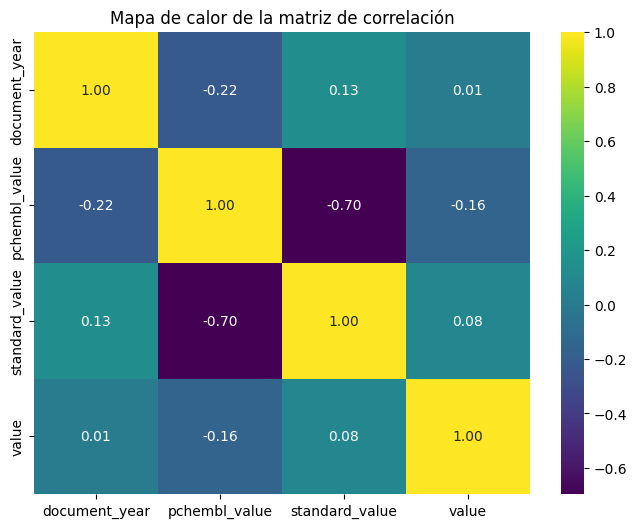

In [25]:
# Calcular la matriz de correlación
# Agregando parametro de que solo se aplique a valores numéricos
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='pearson')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **Spearman**

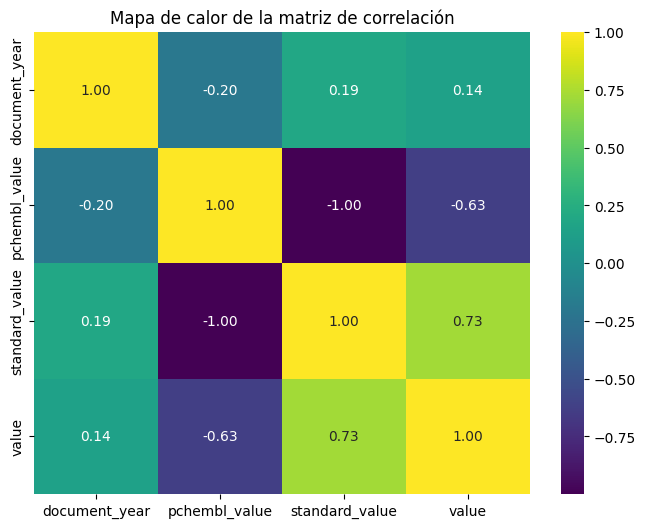

In [26]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='spearman')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **kendall**

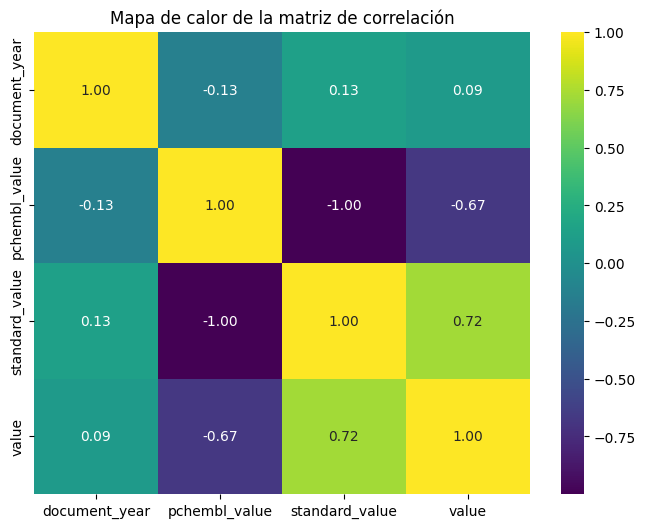

In [27]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='kendall')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

#### Las columnas: molecule_chembl_id,canonical_smiles,standard_value  y bioactivity_class

* **molecule_chembl_id**: Numeracion asignado por CHEMBL a cada molécula que se encuentra en la base de datos y es unico; por lo que se puede identificar siempre en la base de datos bajo el mismo nombre.

* **canonical_smiles**: El SMILES(Simplified Molecular Input Line Entry System) canónica de la estructura molecular, representa la estructura quimica de la molecula, bajo esta se realiza la comparacion entre moleculas y es importante para el analisis computacional de la molecula.

* **standard_value**: Esta determina la eficacia de una molécula para un objetivo biológico que se quiera determinar.


In [28]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_unique_can_smiles[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.00
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.00
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.00
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.00
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.00
...,...,...,...
330,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,515.00
331,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,1660.00
332,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,8980.00
333,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,2.66


Guardar resultados en un archivo CSV

In [29]:
# Subir el csv a la carpeta destino
df3.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv', index=False)

In [30]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv  mannwhitneyu_NumHAcceptors.csv  plot_MW.pdf
bioactivity_data.csv		   mannwhitneyu_NumHDonors.csv	   plot_MW_vs_LogP.pdf
bioactivity_data_curated.csv	   mannwhitneyu_pIC50.csv	   plot_NumHAcceptors.pdf
bioactivity_data_preprocessed.csv  plot_bioactivity_class.pdf	   plot_NumHDonors.pdf
mannwhitneyu_LogP.csv		   plot_ic50.pdf		   results.zip
mannwhitneyu_MW.csv		   plot_LogP.pdf


### Etiquetado de componentes
Unidad IC50: Ayuda a determinar cual es la portencia del compuesto, este entre mas bajo se presenta, indica que hay una mayor potencia del compuesto, pero esto no indica que sea directamente proporcinal a la eficacia.

Esta determina la bioactividad que tiene el compuesto.

IC50 < 1.000nM - Son **activos**

1.000 > IC50 < 10.000 Son **intermedios**

IC50 > 10.000 Son **inactivos**.


In [31]:
# Leer csv con datos preprocesados
df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv')

In [32]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [33]:
# Concatenar lista generada como una serie de pandas y agregarla al df
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.00,inactive
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.00,intermediate
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.00,active
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.00,intermediate
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.00,active
...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,515.00,active
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,1660.00,intermediate
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,8980.00,intermediate
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,2.66,active


Guardad dataframe como archivo csv

In [34]:
# Subir el csv a la carpeta destino
df5.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv', index=False)

#### Cargar datos de bioactividad

In [35]:
# Leer el archivo con los datos curados
df6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv')
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.00,inactive
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.00,intermediate
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.00,active
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.00,intermediate
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.00,active
...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,515.00,active
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,1660.00,intermediate
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,8980.00,intermediate
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,2.66,active


#### Calcular descriptores Lipinski

#### Regla de Lipinski (Regla de Cinco de PFizer - RO5)

Para evaluar la similitud de un fármaco o si el compuesto quimico con determinada actividad farmacologica o biológica tiene propiedades químicas y físicas que probablemente lo convertirían en un fármaco activo por vía oral en humanos. La regla fue formulada por Christopher A. Lipinski en 1997, basándose en la observación de que la mayoría de los fármacos administrados por vía oral son moléculas relativamente pequeñas y moderadamente lipofílicas.

La regla describe propiedades moleculares importantes para la farmacocinética de un fármaco en el cuerpo humano, incluyendo su absorción , distribución , metabolismo y excreción (" ADME "). Sin embargo, la regla no predice si un compuesto es farmacológicamente activo.

Aunque ha sido refutada y criticada la regla, los fármacos diseñados bajo la regla de cinco, tienden a tener tasas de menor deserción en los ensayos clinicos y potencialmente con mayor posibilidad de entrar a producción y al mercado.(Wikipedia, 2024)

In [36]:
def lipinski(smiles, verbose=False):

  moldata = []
  for element in smiles:
    mol = Chem.MolFromSmiles(element)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumAcceptors])

    if i==0:
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columNames = ['MW','LogP','NumHDonors','NumHAcceptors']
  descriptors = pd.DataFrame(data=baseData, columns = columNames)

  return descriptors

In [37]:
df_lipinski = lipinski(df6.canonical_smiles)

#### Combinar DataFrames

In [38]:
# Visualizar el dataframe con los descriptores calculados
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,239.348,1.72180,2.0,6.0
1,379.511,2.74160,2.0,7.0
2,393.538,3.05002,2.0,7.0
3,393.538,3.05002,2.0,7.0
4,424.508,2.64980,2.0,9.0
...,...,...,...,...
266,366.427,4.54470,2.0,2.0
267,366.427,4.68880,2.0,2.0
268,337.385,4.79410,1.0,1.0
269,376.334,2.40330,1.0,3.0


In [39]:
combined_df = pd.concat([df6, df_lipinski], axis=1)
combined_df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.00,inactive,239.348,1.72180,2.0,6.0
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.00,intermediate,379.511,2.74160,2.0,7.0
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.00,active,393.538,3.05002,2.0,7.0
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.00,intermediate,393.538,3.05002,2.0,7.0
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.00,active,424.508,2.64980,2.0,9.0
...,...,...,...,...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,515.00,active,366.427,4.54470,2.0,2.0
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,1660.00,intermediate,366.427,4.68880,2.0,2.0
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,8980.00,intermediate,337.385,4.79410,1.0,1.0
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,2.66,active,376.334,2.40330,1.0,3.0


#### Estandarización del IC50

Modificación de la columna columna de **standard_value**

In [40]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Convierte nM a M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns='standard_value_norm')

  return x

In [41]:
combined_df.standard_value.describe()

,standard_value
count,271.000000
mean,30372.520886
std,60754.863505
min,1.300000
25%,325.000000
50%,1600.000000
75%,35600.000000
max,500000.000000


In [42]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns='standard_value')

    return x

columna **standard_value** normalizada con la función norm_value.

In [43]:
df_norm = norm_value(combined_df)

Cambio de nombre de la columna IC50 a pIC50

In [44]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,inactive,239.348,1.72180,2.0,6.0,4.958607
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,intermediate,379.511,2.74160,2.0,7.0,5.638272
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,393.538,3.05002,2.0,7.0,6.154902
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,intermediate,393.538,3.05002,2.0,7.0,5.657577
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,424.508,2.64980,2.0,9.0,6.886057
...,...,...,...,...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,active,366.427,4.54470,2.0,2.0,6.288193
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,intermediate,366.427,4.68880,2.0,2.0,5.779892
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,intermediate,337.385,4.79410,1.0,1.0,5.046724
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,active,376.334,2.40330,1.0,3.0,8.575118


In [45]:
df_final.pIC50.describe()

,pIC50
count,271.000000
mean,5.646899
std,1.221276
min,3.301030
25%,4.448612
50%,5.795880
75%,6.488168
max,8.886057


#### clase bioactiva intermedia

En el analisis de datos para la clase intermedia, estos son eliminados; esto para  tener datos mas concretos de analisis

In [46]:
df_2classes = df_final[df_final['class'] != 'intermediate']
df_2classes

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,inactive,239.348,1.72180,2.0,6.0,4.958607
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,393.538,3.05002,2.0,7.0,6.154902
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,424.508,2.64980,2.0,9.0,6.886057
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,active,424.508,2.64980,2.0,9.0,6.040959
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],inactive,286.353,2.45340,1.0,4.0,4.000000
...,...,...,...,...,...,...,...,...
262,CHEMBL4876679,O=C(NN=C1C2CC3CC(C2)CC1C3)c1ccc(C(F)(F)F)cc1,inactive,336.357,4.24730,1.0,2.0,3.703335
265,CHEMBL4853135,C/C(=N\NC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3...,inactive,364.411,5.02750,1.0,2.0,4.976748
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,active,366.427,4.54470,2.0,2.0,6.288193
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,active,376.334,2.40330,1.0,3.0,8.575118


### *Columnas de Dataset Solucion - Explicación de sus componentes**

La base de datos ChEMBL es el recurso principal que tenemos en este proyecto, para el diseño de fármaco; ya que contiene la información sobre compuestos bioactivos.

* Cada molécula en CHEMBL se identifica con un código único, con el cual se puede recuperar los datos de cada entidad química de manera ágil.

* SMILES Canónica, es la codificación de la estructura bidimensional de estas moléculas, esta notación es una representación lineal de la complejidad topológica de las moléculas. Esta cadena, permite reconstruir y manipular estructuras moleculares con facilidad, al igual que de manera fácil se pueden realizar análisis comparativos y determinar similitud entre diferentes compuestos a través de sus estructuras.

* La bioactividad, cuya clasificación: activo o inactivo, ayuda a determinar qué tipo de interacción significativa tiene un compuesto con el objetivo biológico. Compuesto activo - interacción significativa, por lo que su respuesta puede ser cuantificable y relevante. Compuestos inactivos - interacción no significativa. Esta clasificación es un primer paso para separar inicialmente compuesto que tienen interacción significativa y que son los elegido a ser parte de análisis de desarrollo del nuevo fármaco.

* La masa molecular, expresada en Daltons (Da), es un indicador de las propiedades farmacocinéticas de un compuesto. Corresponde a la suma de las masas atómicas de todos los elementos constituyentes de la molécula, esta es de importancia clave debido a que es da un indicio de cómo el cuerpo procesa el compuesto respecto a su absorción y distribución.

* El coeficiente de partición, (LogP), representa la relación de concentraciones del compuesto en octanol y agua.

* El pIC50, es el logaritmo negativo de la concentración inhibitoria media (IC50). El cual se ha utilizado para comparar la eficacia de diferentes compuestos. Un pIC50 más alto indica una mayor potencia, es decir una menor cantidad del compuesto y se logra el mismo efecto inhibitorio.
Este conjunto de datos seleccionado es para contar con los descriptores moleculares de los compuestos en ChEMBL.


In [47]:
# Guardar dataframe en archivo csv
df_final.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv', index=False)

### EDA - Exploratory Data Analysis (Análisis del Espacio Químico) Uso de las propiedades de Lipinski

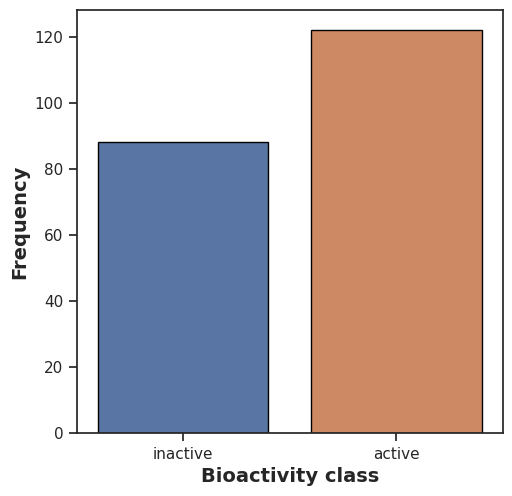

In [48]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2classes, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf')

#### Gráfica de dispersión

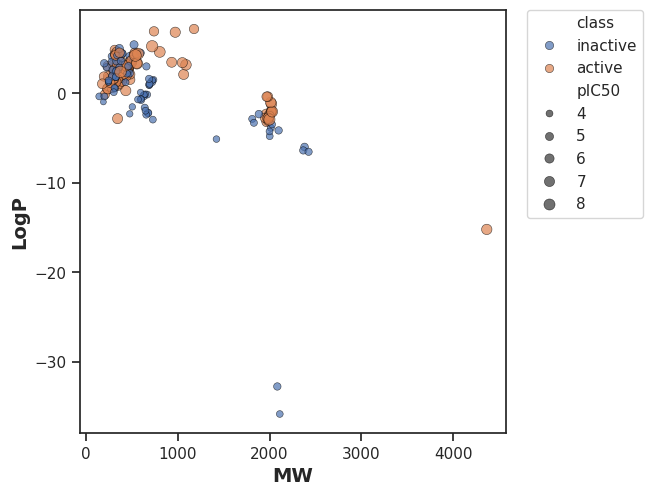

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf')

#### Diagrama de caja

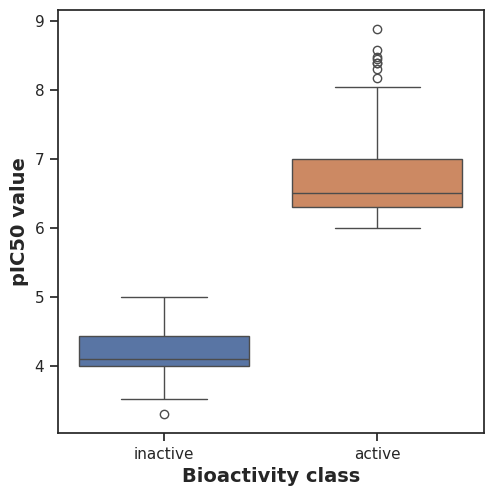

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf')

#### Análisis estadístico
**Prueba U Mann-Whitney**
La prueba de U de Mann-Whitney es una prueba estadística no paramétrica utilizada para comparar dos grupos independientes. Es una alternativa a la prueba t de Student cuando no se pueden asumir las condiciones para aplicar pruebas paramétricas


In [51]:
def mannwhitney(descriptor, verbose=False):

  # Generador de semilla aleatoria
    seed(1)

  # Activos e inactivos
    selection = [descriptor, 'class']
    df = df_2classes[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2classes[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

  # Comparar muestras
    stat, p = mannwhitneyu(active, inactive)

  # Interpretar
    alpha = 0.05
    if p > alpha:
      interpretation = 'Same distribution (fail to reject H0)'
    else:
      interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(f'/content/drive/My Drive/Colab Notebooks/data/{filename}')

    return results

In [52]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,10736.0,4.193884e-35,0.05,Different distribution (reject H0)


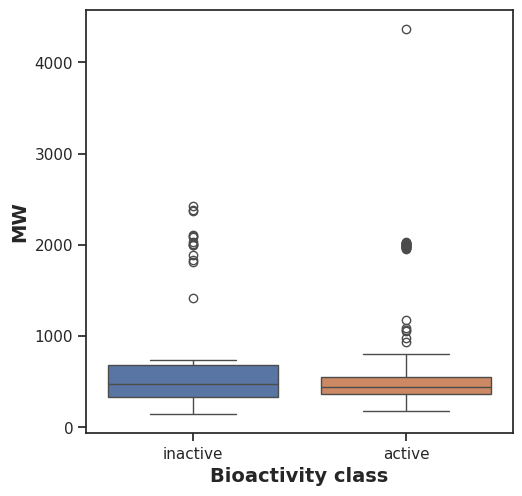

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf')

In [54]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5271.0,0.824229,0.05,Same distribution (fail to reject H0)


#### LogP

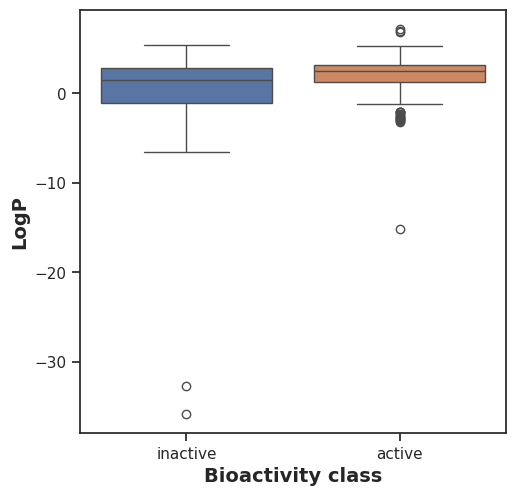

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf')

In [56]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6838.5,0.000716,0.05,Different distribution (reject H0)


#### NumHDonors

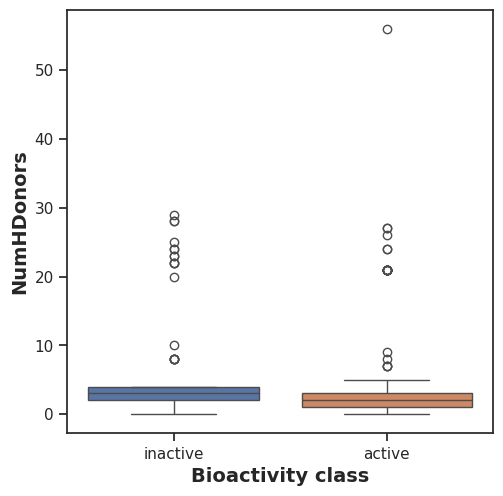

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf')

In [58]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3926.5,0.000665,0.05,Different distribution (reject H0)


#### NumHAcceptors

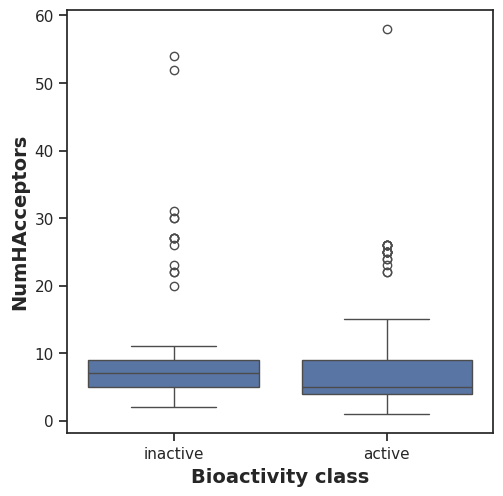

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf')

In [60]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4608.0,0.076737,0.05,Same distribution (fail to reject H0)


In [61]:
# Guardar archivos en un archivo zip
!zip -r /content/drive/My\ Drive/Colab\ Notebooks/data/results.zip /content/drive/My\ Drive/Colab\ Notebooks/data/*.pdf /content/drive/My\ Drive/Colab\ Notebooks/data/*.csv

updating: content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf (deflated 36%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf (deflated 10%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv (deflated 81%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv (deflated 92%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv (deflated 87%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv (deflate

In [62]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv  mannwhitneyu_NumHAcceptors.csv  plot_MW.pdf
bioactivity_data.csv		   mannwhitneyu_NumHDonors.csv	   plot_MW_vs_LogP.pdf
bioactivity_data_curated.csv	   mannwhitneyu_pIC50.csv	   plot_NumHAcceptors.pdf
bioactivity_data_preprocessed.csv  plot_bioactivity_class.pdf	   plot_NumHDonors.pdf
mannwhitneyu_LogP.csv		   plot_ic50.pdf		   results.zip
mannwhitneyu_MW.csv		   plot_LogP.pdf


## Conclusión

El estudio realizado sobre la base de datos CHEMBL, es para determinar posibles interrelaciones entre las moléculas, centrándose específicamente en su actividad biológica y su capacidad para inhibir la proteína F13.

Estas similitudes estructurales entre moléculas efectivas proporcionan puntos claves con los cuales se puede llegar a la actividad biológica deseada.

Al determinar algunas relaciones se cuenta con una visión de los factores influenciadores en la eficacia de las moléculas, y buscar posible optimización de compuestos. Teniendo en cuenta que la manipulación de estos descriptores químicos podría permitir mejorar potencialmente la eficacia terapeutica debido el ajuste de las propiedades moleculares, segun lo estudiado.

Lo que se ha determinado es un analisis de datos teniendo en cuenta el funcionamiento de la moléculas en el contexto biológico y contar con las bases para la fase de ingeniería de datos.

## Referencias

1. DECS/MESH. (2019, 01 enero). https://decs.bvsalud.org/es/ths/resource/?id=23621#Details

2. Farmaindustria. (2023, diciembre). Cuánto tiempo se tarda en desarrollar un medicamento y por qué. https://www.farmaindustria.es/web/reportaje/cuanto-tiempo-se-tarda-y-por-que-en-desarrollar-un-medicamento/

3. Sklenovská, N., Ranst, V. Front. Public Health. (2018, 03 September). Emergence of Monkeypox as the Most Important Orthopoxvirus Infection in Humans.https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2018.00241/full

4. Colaboradores de Wikipedia. (26 de septiembre de 2024). Regla de cinco de Lipinski. En Wikipedia, La enciclopedia libre . Consultado el 14 de octubre de 2024 a las 13:18, en https://en.wikipedia.org/w/index.php?title=Regla_de_cinco_de_Lipinski&oldid=1247812776
